In [94]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
print('import successfull')

import successfull


In [120]:
input_size= 784
hidden_size = 500
num_classes  = 10
num_epochs = 10
batch_size = 100
learning_rate = 0.001

In [98]:
# MNIST datset
train_dataset = torchvision.datasets.MNIST(root= './data',
                                           train= True,
                                           transform = transforms.ToTensor(),
                                           download  = True)

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [100]:
# MNIST datset
test_dataset = torchvision.datasets.MNIST(root= './data',
                                           train= False,
                                           transform = transforms.ToTensor())

In [101]:
# Data loader 
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size= batch_size,
                                           shuffle = True)

In [103]:
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size= batch_size,
                                          shuffle= False)

In [104]:
ex = iter(test_loader)
ex_data , ex_targets = ex.next()

In [108]:
ex_data[1][0]

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.4549, 0.4902, 0.6706, 1.0000, 1.0000, 0.5882, 0.3647, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

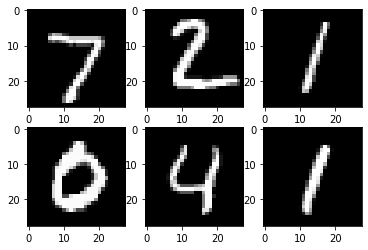

In [110]:
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(ex_data[i][0], cmap='gray')
plt.show()

In [121]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no activation and no softmax at the end
        return out

In [122]:
model = NeuralNet(input_size, hidden_size, num_classes)
model

NeuralNet(
  (l1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (l2): Linear(in_features=500, out_features=10, bias=True)
)

In [123]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

In [124]:
# Train the model
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28)
        labels = labels
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')


Epoch [1/10], Step [100/600], Loss: 0.2211
Epoch [1/10], Step [200/600], Loss: 0.3782
Epoch [1/10], Step [300/600], Loss: 0.3419
Epoch [1/10], Step [400/600], Loss: 0.1371
Epoch [1/10], Step [500/600], Loss: 0.0737
Epoch [1/10], Step [600/600], Loss: 0.2094
Epoch [2/10], Step [100/600], Loss: 0.0731
Epoch [2/10], Step [200/600], Loss: 0.0684
Epoch [2/10], Step [300/600], Loss: 0.1521
Epoch [2/10], Step [400/600], Loss: 0.1415
Epoch [2/10], Step [500/600], Loss: 0.1418
Epoch [2/10], Step [600/600], Loss: 0.0543
Epoch [3/10], Step [100/600], Loss: 0.0649
Epoch [3/10], Step [200/600], Loss: 0.0929
Epoch [3/10], Step [300/600], Loss: 0.0465
Epoch [3/10], Step [400/600], Loss: 0.1036
Epoch [3/10], Step [500/600], Loss: 0.0584
Epoch [3/10], Step [600/600], Loss: 0.0525
Epoch [4/10], Step [100/600], Loss: 0.0809
Epoch [4/10], Step [200/600], Loss: 0.0671
Epoch [4/10], Step [300/600], Loss: 0.0457
Epoch [4/10], Step [400/600], Loss: 0.0381
Epoch [4/10], Step [500/600], Loss: 0.0439
Epoch [4/10

In [125]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28)
        labels = labels
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

Accuracy of the network on the 10000 test images: 98.0 %
